The collection of images are classified into three important anatomical landmarks and three clinically significant findings.In addition, it contains two categories of images related to endoscopic polyp removal.
- The dataset consist of the images with different resolution from 720x576 up to 1920x1072 pixels

In [1]:
# Anatomical Landmarks
"""Z-line, Pylorus, cecum"""
# clinically significant findings
"""esophagitis,polyps,ulcerative-colitis """
#Polyp Removal
"""dyed-lifted-polyps,dyed-resection-margins """

'dyed-lifted-polyps,dyed-resection-margins '

In [1]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 25.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.2 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import os, numpy as np, cv2
from PIL import Image
from collections import Counter
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import albumentations as A

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
path = "/kaggle/input/kvasir-gi-image-classification/kvasir-dataset-v2"
classes = os.listdir(path)

#### Original Image from each class

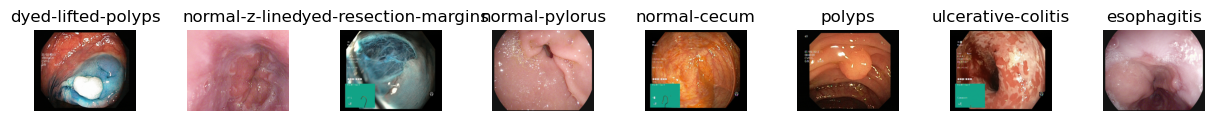

In [6]:
sample_images = []
class_to_idx ={cls: idx for idx, cls in enumerate(classes)}
total_images = sum([len(files) for _, _, files in os.walk(path)])
num_classes = len(classes)
for cls in classes:
    class_path = os.path.join(path, cls)
    image_files = os.listdir(class_path)
    sample_image_path = os.path.join(class_path, image_files[0])
    sample_images.append(Image.open(sample_image_path))
plt.figure(figsize=(12, 6))
for i, img in enumerate(sample_images):
    plt.subplot(1, num_classes, i+1)
    plt.imshow(img)
    plt.title(classes[i])
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [8]:
random_class = np.random.choice(classes)
random_image_path = os.path.join(path, random_class, np.random.choice(os.listdir(os.path.join(path, random_class))))

#### Class of shapes

In [15]:
image_shapes = []
# Loop through the dataset and collect image shapes
class_folders = os.listdir(path)
image_shapes = []
# Loop through the dataset and collect image shapes
class_folders = os.listdir(path)
for cls in class_folders:
    class_path = os.path.join(path, cls)
    image_files = os.listdir(class_path)
    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        shape = img.shape
        image_shapes.append(shape)
# Count the unique image shape
shape_counts = Counter(image_shapes)

# Sort the image shapes by frequency (in descending order)
sorted_shapes = sorted(shape_counts.items(), key=lambda x: x[1], reverse=True)

# Display the all the shapes
top_shapes = sorted_shapes[:3]
for shape, count in top_shapes:
    print(f"Shape: {shape}, Count: {count}")

Shape: (576, 720, 3), Count: 5137
Shape: (1024, 1280, 3), Count: 2122
Shape: (1072, 1920, 3), Count: 734


#### Pixel Intensity

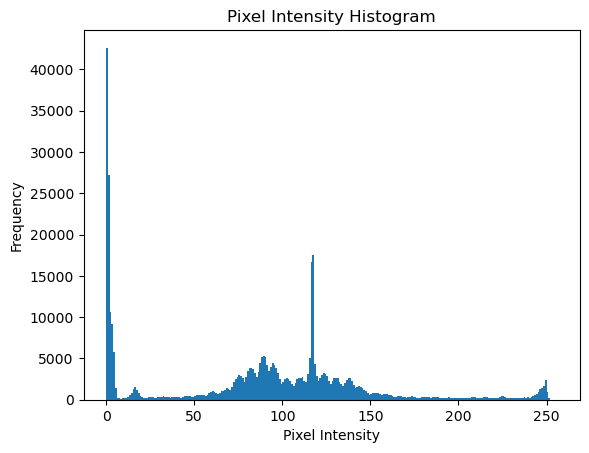

In [12]:
image_files = [f for f in os.listdir(image_directory) if f.endswith('.jpg') or f.endswith('.png')]

# Choose a random image from the list
random_image_file = random.choice(image_files)

# Construct the full path to the random image
random_image_path = os.path.join(image_directory, random_image_file)
image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)

# Calculate and plot the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.hist(image.ravel(), 256, [0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Histogram')
plt.show()

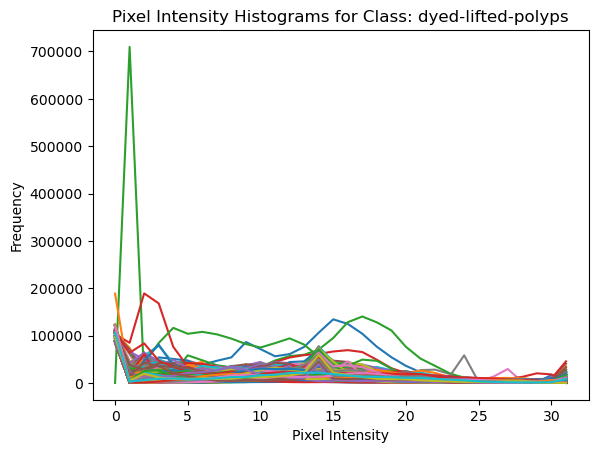

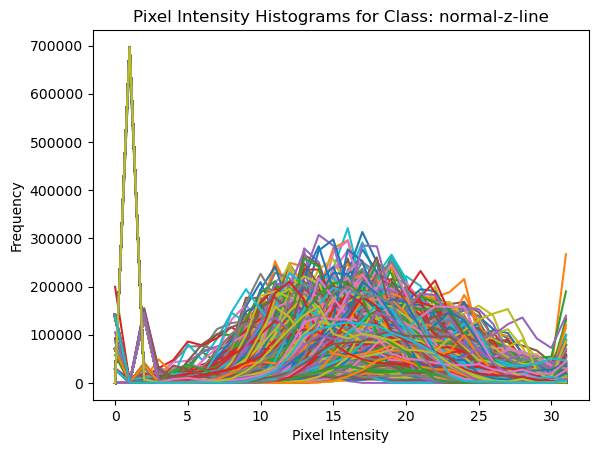

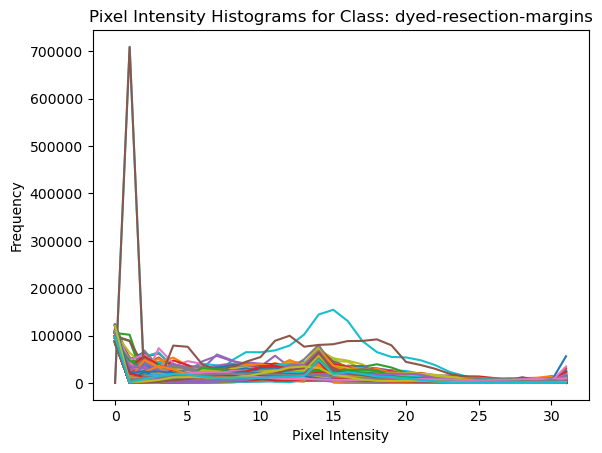

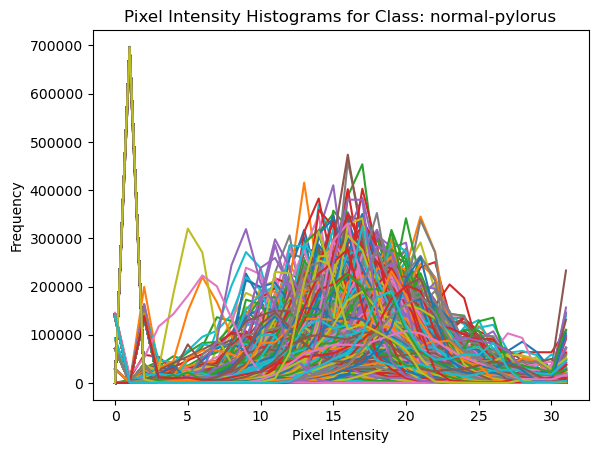

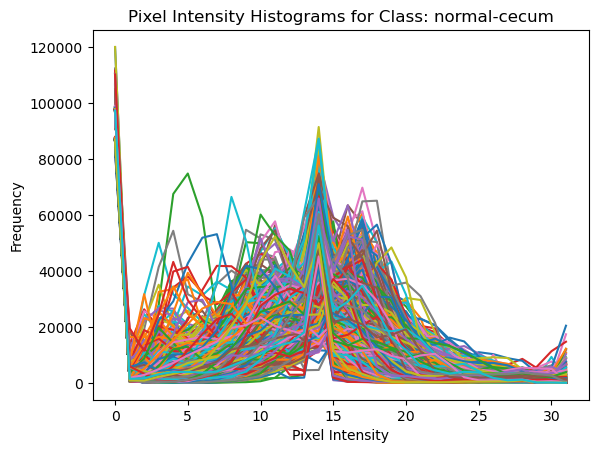

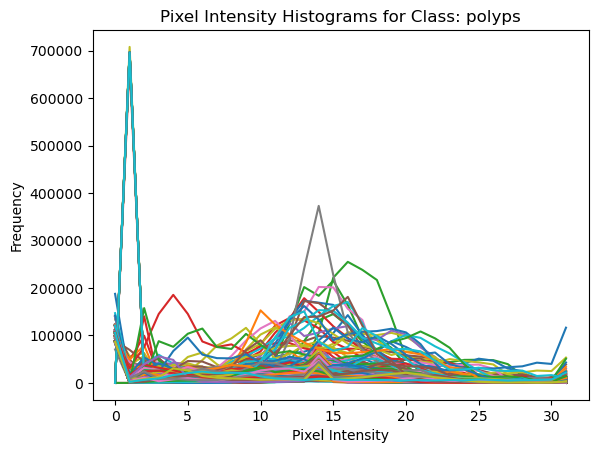

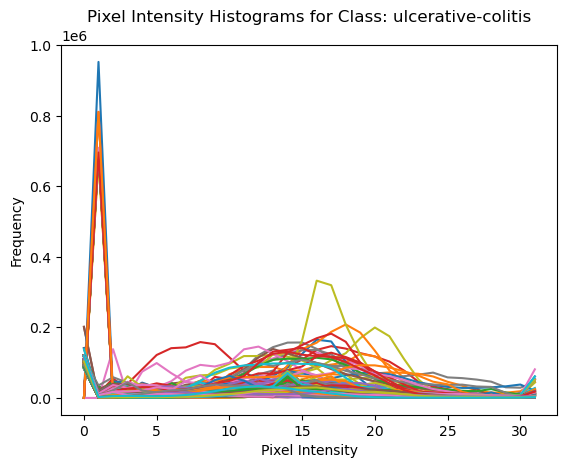

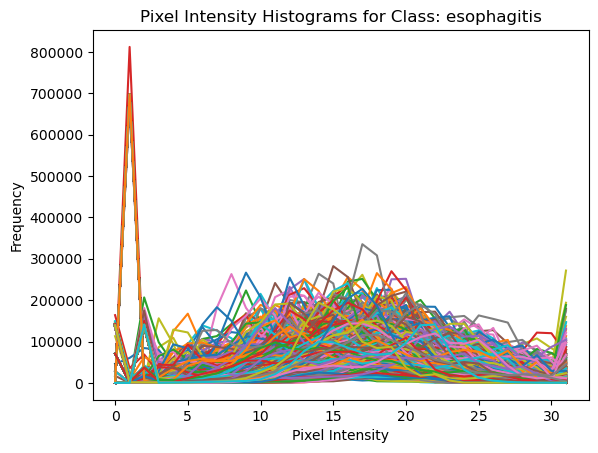

In [14]:
num_bins = 32

# Iterate through each class
for class_name in classes:
    class_dir = os.path.join(path, class_name)
    
    # Initialize an empty list to store histograms for this class
    class_histograms = []
    
    # Iterate through images in the class
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Calculate the histogram with the specified number of bins
        hist = cv2.calcHist([image], [0], None, [num_bins], [0, 256])
        
        # Append the histogram to the list
        class_histograms.append(hist)
    
    # Plot the histograms for this class
    plt.figure()
    plt.title(f'Pixel Intensity Histograms for Class: {class_name}')
    for hist in class_histograms:
        plt.plot(hist)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

#### Sample Image Augmentation

/opt/conda/lib/python3.10/site-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


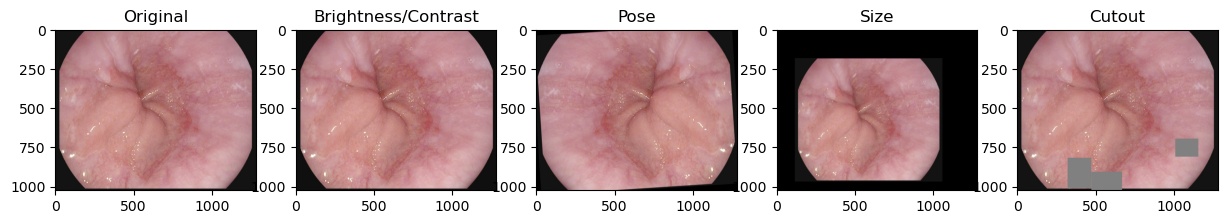

In [18]:
image_path = random_image_path
image = cv2.imread(image_path)

brightness_contrast_augmenter = iaa.Sequential([
    iaa.Multiply((0.7, 1.3), per_channel=0.2),  # Adjust brightness
    iaa.ContrastNormalization((0.7, 1.3), per_channel=0.2)  # Adjust contrast
])

pose_augmenter = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),  # Rotate object
    iaa.Fliplr(0.5),  # Horizontal flipping
])

size_augmenter = iaa.Sequential([
    iaa.Affine(scale=(0.7, 1.3)),  # Scale object size
    iaa.CropAndPad(percent=(-0.1, 0.1))  # Crop and pad to adjust size
])

cutout_augmenter = iaa.Sequential([
    iaa.Cutout(nb_iterations=(1, 3), size=(0.1, 0.2), squared=False)
])

# Apply augmentations to the sample image
image_brightness_contrast = brightness_contrast_augmenter(image=image)
image_pose = pose_augmenter(image=image)
image_size = size_augmenter(image=image)
image_cutout = cutout_augmenter(image=image)

# Display the original and augmented images
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

# Titles for augmented images
augmentation_titles = ["Brightness/Contrast", "Pose", "Size", "Cutout"]

# Display augmented images
augmented_images = [image_brightness_contrast, image_pose, image_size, image_cutout]

for i, augmented_image in enumerate(augmented_images):
    plt.subplot(1, 5, i + 2)
    plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    plt.title(augmentation_titles[i])

plt.show()

#### Used Image Augmentation

/opt/conda/lib/python3.10/site-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


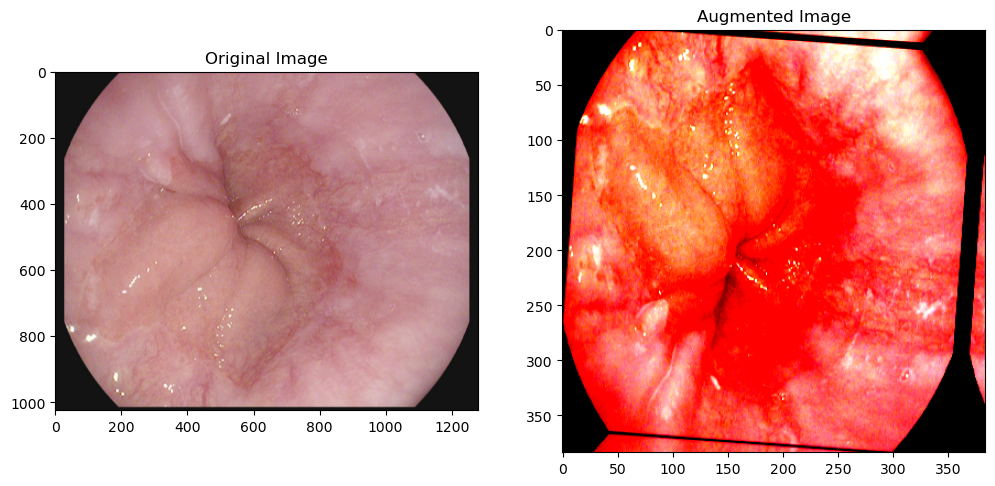

In [21]:
image_size=384
# Load a sample image (replace "your_image.jpg" with the path to your image)
image_path = random_image_path # Replace with the actual path to your sample image
image = cv2.imread(image_path)

# Define the augmentation pipeline
transform = A.Compose([
    A.Resize(height=image_size, width=image_size, interpolation=cv2.INTER_LINEAR),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=30, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Transpose(p=0.5),
    A.RandomBrightness(limit=0.1, p=0.7),
    A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.1, rotate_limit=10, p=0.5),
    A.RandomBrightnessContrast(0.1, 0.1, p=0.5),
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    A.OneOf([
        A.OpticalDistortion(distort_limit=1.),
        A.GridDistortion(num_steps=5, distort_limit=1.),
    ], p=0.5),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
        max_pixel_value=255.0,
    ),
])

# Apply the augmentations to the image
augmented_image = transform(image=image)["image"]

# Display the original and augmented images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
plt.title("Augmented Image")

plt.show()
